# Bank Marketing Project

## Dataset
This [dataset](https://www.kaggle.com/prakharrathi25/banking-dataset-marketing-targets?select=train.csv) is publicly available for research. 

## Task 

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict ***if the client will subscribe to a term deposit (variable y)***

## Detailed Column Descriptions
bank client data:

- **age:** (numeric)
- **job:** type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur",...,"student")
- **marital:** marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- **education:** (categorical: "unknown","secondary","primary","tertiary")
- **default:** has credit in default? (binary: "yes","no")
- **balance:** average yearly balance, in euros (numeric)
- **housing:** has housing loan? (binary: "yes","no")
- **loan:** has personal loan? (binary: "yes","no")
### related with the last contact of the current campaign:
- **contact:** contact communication type (categorical: "unknown","telephone","cellular")
- **day:** last contact day of the month (numeric)
- **month:** last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
### other attributes:
- **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- **previous:** number of contacts performed before this campaign and for this client (numeric)
- **poutcome:** outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
- **y** - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

# Outline

1. Importing Libraries
2. EDA
3. Data Wranging 
4. Modelling 
5. Model Evaluation

In [5]:
# Importing libraries
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error

print('imported')

imported


In [6]:
X_train = pd.read_csv('train.csv', sep=';')
X_test = pd.read_csv('test.csv', sep=';')

In [3]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [82]:
X_train.shape, X_test.shape

((45211, 17), (4521, 17))

In [83]:
X_train.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [84]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [85]:
X_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## Exploratory Data Analysis 

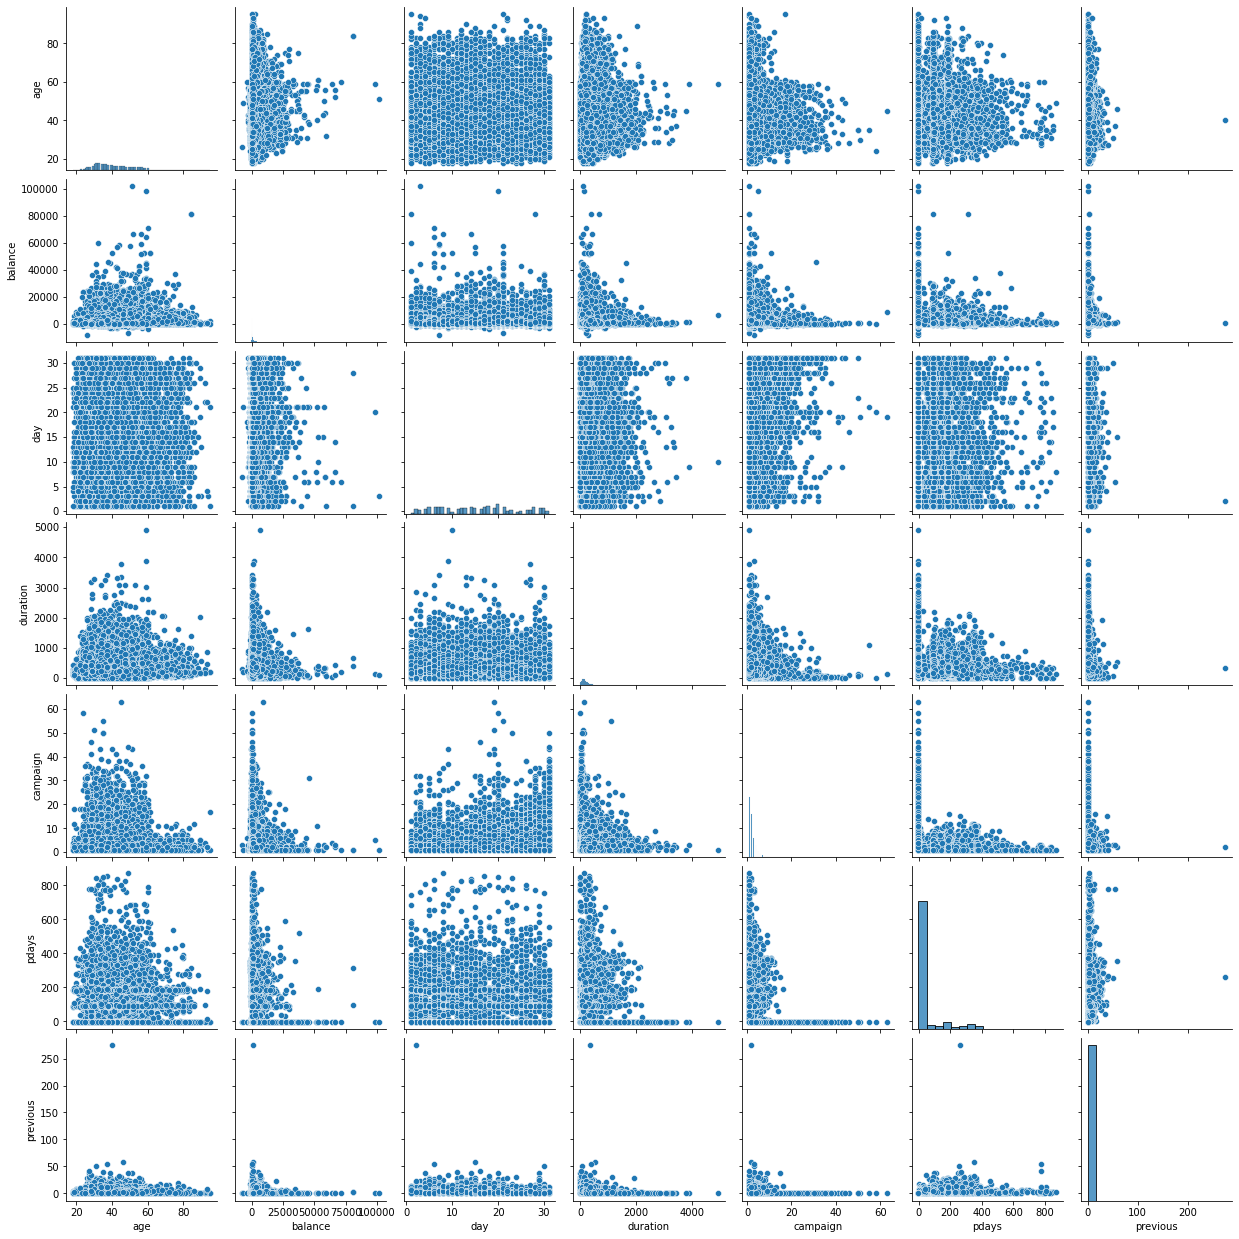

In [86]:
sns.pairplot(X_train)
plt.show()

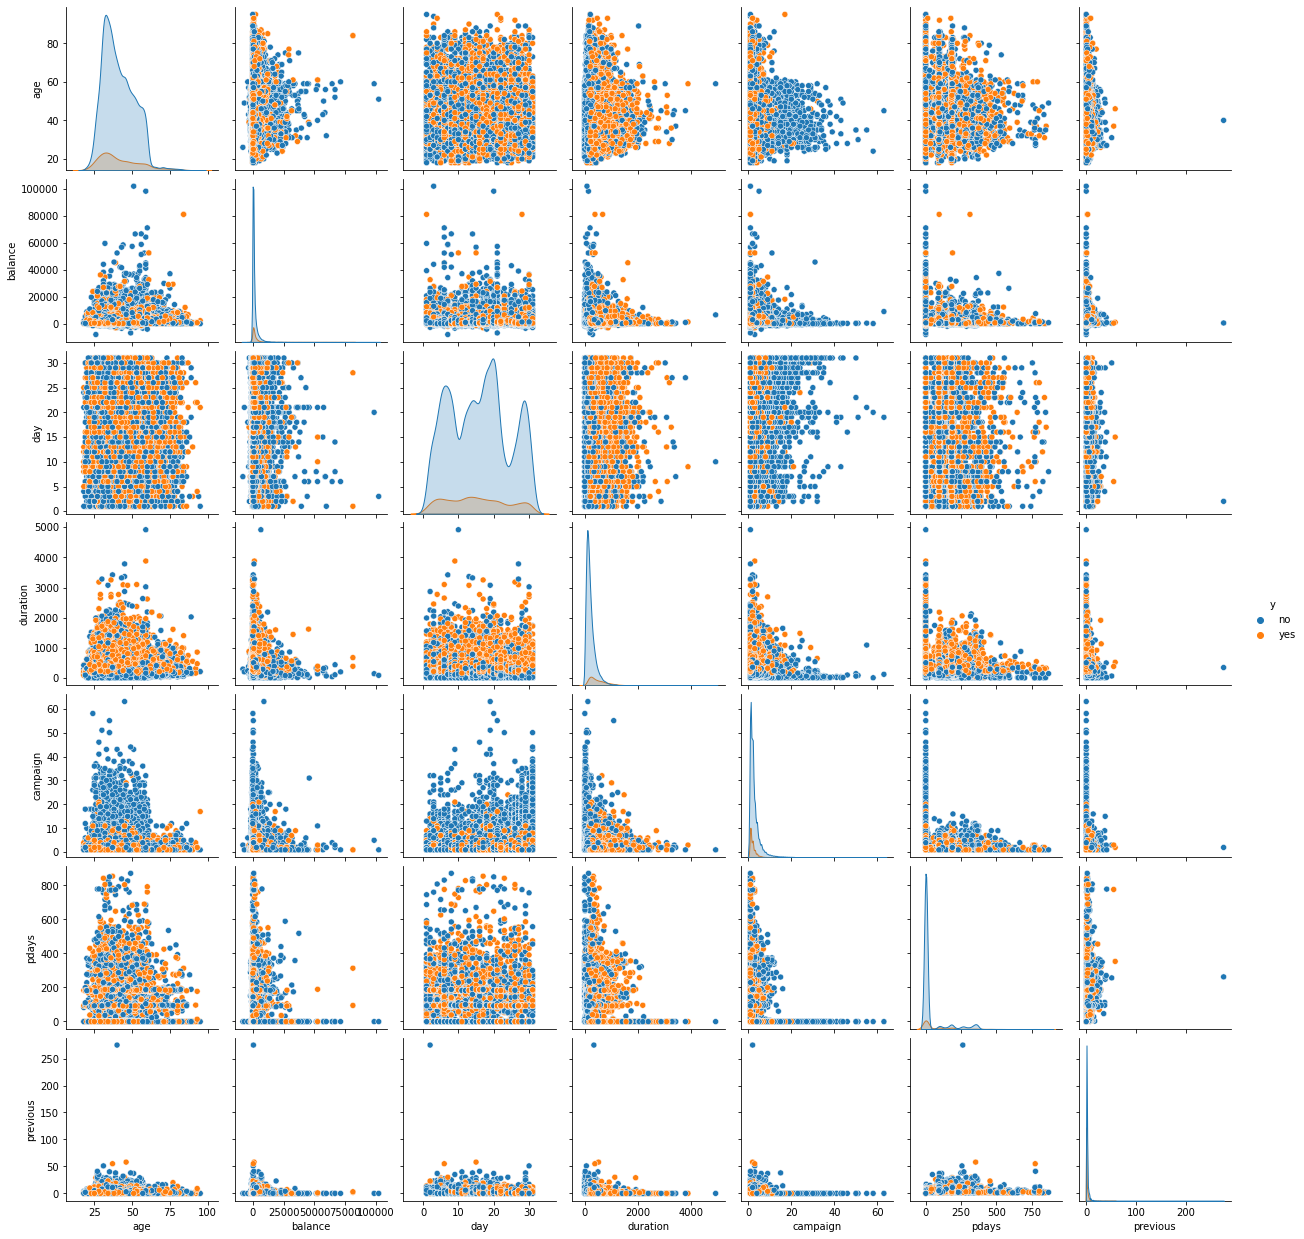

In [87]:
# Distribution of train set, colour encoded with target
sns.pairplot(X_train, hue='y')
plt.show()

### Here below we can see distribution of numerical columns

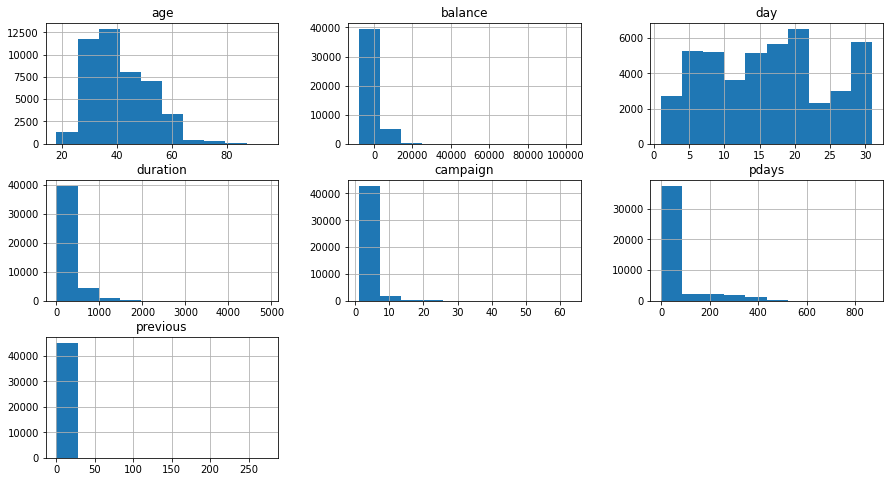

In [88]:
# Histrogram represents distribtuion of numerical columns in the train set
X_train.hist(alpha=1, figsize=(15, 8), bins=10)
plt.show()

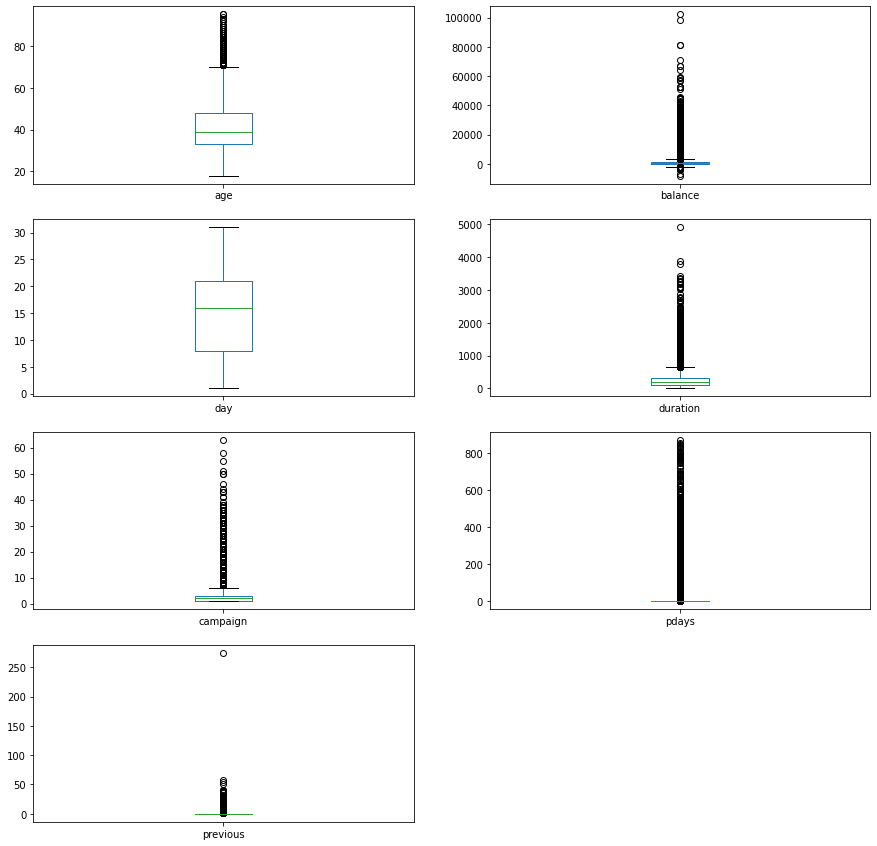

In [89]:
# Box plot for numerical columns. What we can observe is there is some outliers in all numerical columns 
X_train.plot(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False, figsize = (15,15))
plt.show()

#### Below histrogram indicates that majority of the clients' age is in the range of 25 - 60

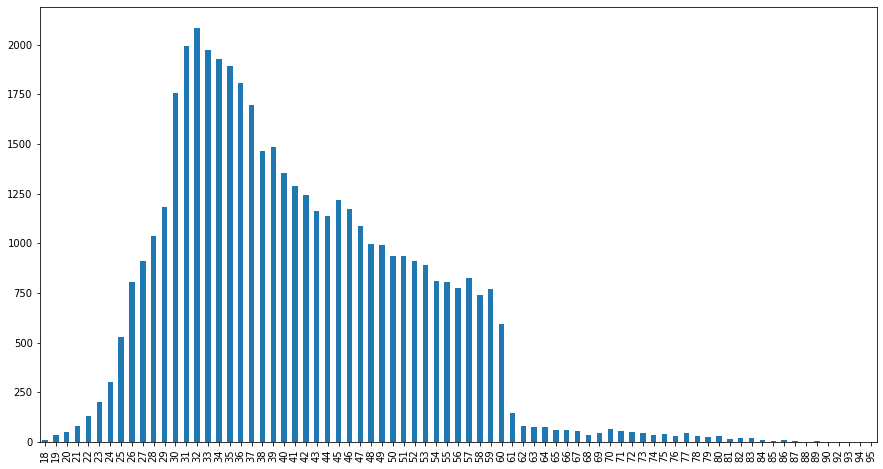

In [90]:
X_train['age'].value_counts().sort_index().plot.bar(figsize=(15, 8))
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


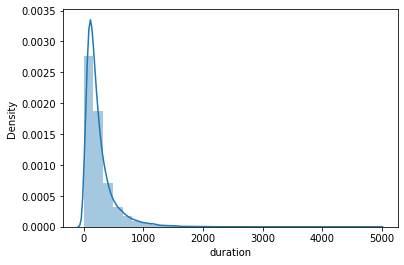

In [91]:
sns.distplot(X_train['duration'], bins=30, kde=True)
plt.show()

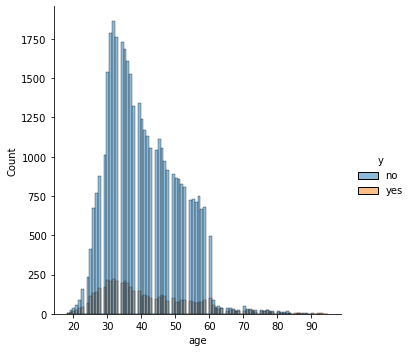

In [92]:
sns.displot(data=X_train, x='age', hue='y', kind='hist')
plt.show()

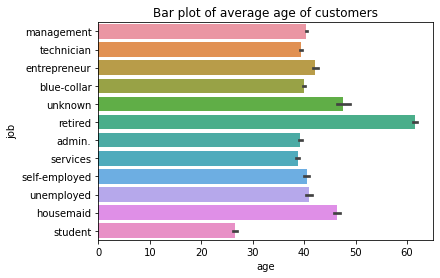

In [7]:
# Bar plot of average age of customers.
sns.barplot(data=X_train, x='age', y='job')
plt.title('Bar plot of average age of customers')
plt.show()

From the bar graph above we can observe average age in all job categories is 40, except student and retired for obvious reasons

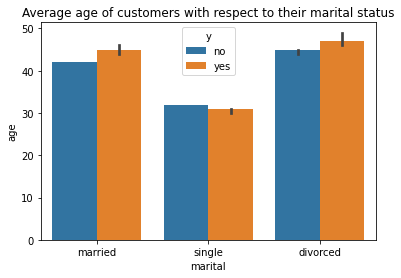

In [8]:
# bar graph below color encoded with target. It show average age of customers with respect to their different marital status.
sns.barplot(data=X_train, x='marital', y='age', hue='y', estimator=np.median)
plt.title('Average age of customers with respect to their marital status')
plt.show()

As is shown bar graph above that majority of the customers subrcibed in the service are divorsed and married around 45 while customer with marital status single around 30.

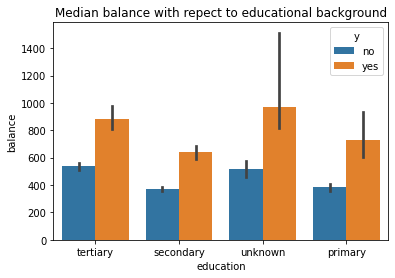

In [9]:
sns.barplot(data=X_train, x='education', y='balance', hue='y', estimator=np.median)
plt.title('Median balance with repect to educational background')
plt.show()

Graph above illustrates that people with unknown balance tent to have highest balance and apply for sevice in many cases compard to customers with other types of educational background

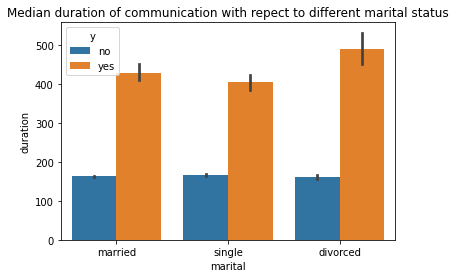

In [12]:
sns.barplot(data=X_train, x='marital', y='duration', hue='y', estimator=np.median)
plt.title('Median duration of communication with repect to different marital status')
plt.show()

Customers having divorsed marital status has the highest duration median and they responsible for the hight number of subcribtion. So what we can conclude is having longer communication can end up having new subcriber. 

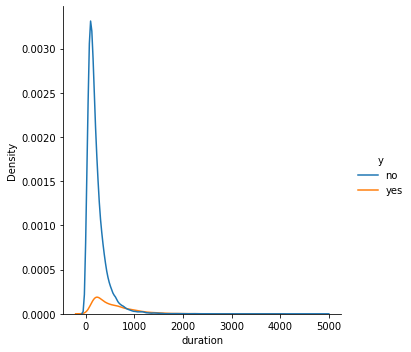

In [98]:
sns.displot(data=X_train, x='duration', hue='y', kind='kde')
plt.show()

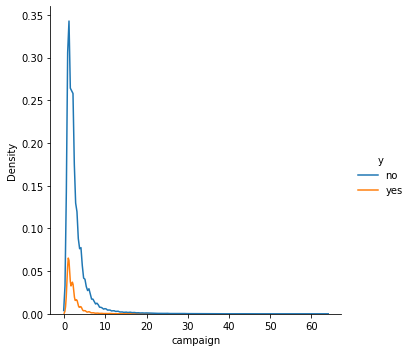

In [99]:
sns.displot(data=X_train, x='campaign', hue='y', kind='kde')
plt.show()

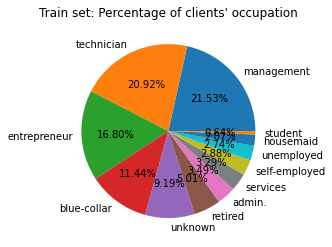

In [100]:
y_counts = X_train['job'].value_counts()

plt.pie(y_counts, autopct = '%1.2f%%', labels=X_train.job.unique(), radius=1)
plt.title("Train set: Percentage of clients' occupation")
plt.show()

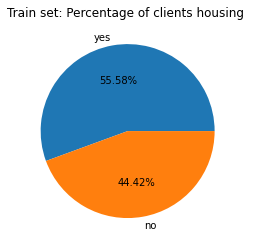

In [101]:
y_counts = X_train['housing'].value_counts()

plt.pie(y_counts, autopct = '%1.2f%%', labels=X_train.housing.unique())
plt.title('Train set: Percentage of clients housing ')
plt.show()

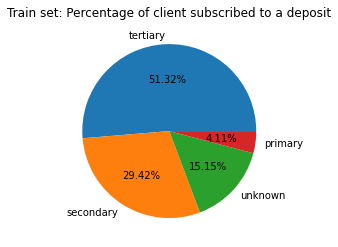

In [102]:
y_counts = X_train['education'].value_counts()

plt.pie(y_counts, autopct = '%1.2f%%', labels=X_train.education.unique())
plt.title('Train set: Percentage of client subscribed to a deposit')
plt.show()

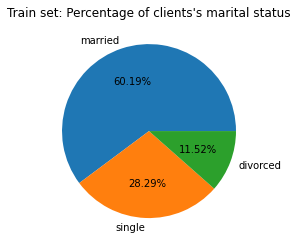

In [103]:
y_counts = X_train['marital'].value_counts()

plt.pie(y_counts, autopct = '%1.2f%%', labels=X_train.marital.unique())
plt.title("Train set: Percentage of clients's marital status")
plt.show()

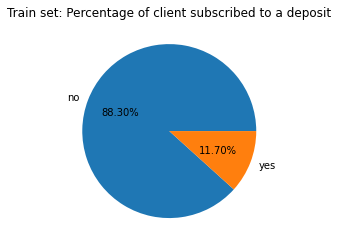

In [104]:
y_counts = X_train['y'].value_counts()

plt.pie(y_counts, autopct = '%1.2f%%', labels=X_train.y.unique())
plt.title('Train set: Percentage of client subscribed to a deposit')
plt.show()

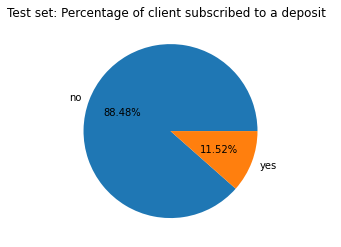

In [105]:
y_counts = X_test['y'].value_counts()

plt.pie(y_counts, autopct = '%1.2f%%', labels=X_test.y.unique())
plt.title('Test set: Percentage of client subscribed to a deposit  ')
plt.show()

In the last two pie charts represents that dataset in both train and test set. The first thing we can notice is the balance of the inctances in the target column. The ratio of the yes and no roughly 9:1 

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [107]:
X_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
X_train['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [16]:
X_test['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

Below output of the code we can see there is no missing values in the training set

In [17]:
X_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Below output of the code we can see there is no missing values in the test set

In [13]:
X_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
attributes = (X_train.dtypes == 'int64')
num_att_train = list(attributes[attributes].index)
num_att_train

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [6]:
attributes = (X_test.dtypes == 'int64')
num_att_test = list(attributes[attributes].index)
num_att_test

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [7]:
attributes = (X_train.dtypes == 'object')
cat_att_train = list(attributes[attributes].index)
cat_att_train.remove('default')
cat_att_train.remove('housing')
cat_att_train.remove( 'loan')
cat_att_train.remove( 'y')
cat_att_train

['job', 'marital', 'education', 'contact', 'month', 'poutcome']

In [8]:
attributes = (X_train.dtypes == 'object')
cat_att_test = list(attributes[attributes].index)
cat_att_test.remove('default')
cat_att_test.remove('housing')
cat_att_test.remove( 'loan')
cat_att_test.remove( 'y')
cat_att_test

['job', 'marital', 'education', 'contact', 'month', 'poutcome']

In [23]:
X_train.job.unique(), X_train.job.value_counts()

(array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'retired', 'admin.', 'services', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 blue-collar      9732
 management       9458
 technician       7597
 admin.           5171
 services         4154
 retired          2264
 self-employed    1579
 entrepreneur     1487
 unemployed       1303
 housemaid        1240
 student           938
 unknown           288
 Name: job, dtype: int64)

In [24]:
X_train.marital.unique(), X_train.marital.value_counts()

(array(['married', 'single', 'divorced'], dtype=object),
 married     27214
 single      12790
 divorced     5207
 Name: marital, dtype: int64)

In [25]:
X_train.education.unique(), X_train.education.value_counts()

(array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 secondary    23202
 tertiary     13301
 primary       6851
 unknown       1857
 Name: education, dtype: int64)

In [26]:
X_train.default.unique(), X_train.default.value_counts()

(array(['no', 'yes'], dtype=object),
 no     44396
 yes      815
 Name: default, dtype: int64)

In [10]:
default = {'yes':1, 
          'no':0}
X_train['default'] = X_train['default'].replace(default) 

In [11]:
default1 = {'yes':1, 
          'no':0}
X_test['default'] = X_test['default'].replace(default1) 

In [12]:
X_train.housing.unique(), X_train.housing.value_counts()

(array(['yes', 'no'], dtype=object),
 yes    25130
 no     20081
 Name: housing, dtype: int64)

In [13]:
housing = {'yes':1, 
          'no':0}
X_train['housing'] = X_train['housing'].replace(housing) 

In [14]:
housing1 = {'yes':1, 
          'no':0}
X_test['housing'] = X_test['housing'].replace(housing1) 

In [15]:
X_train.loan.unique(), X_train.loan.value_counts()

(array(['no', 'yes'], dtype=object),
 no     37967
 yes     7244
 Name: loan, dtype: int64)

In [16]:
loan = {'yes':1, 
          'no':0}
X_train['loan'] = X_train['loan'].replace(loan) 

In [17]:
loan1 = {'yes':1, 
          'no':0}
X_test['loan'] = X_test['loan'].replace(loan1) 

In [35]:
X_train.contact.unique(), X_train.contact.value_counts()

(array(['unknown', 'cellular', 'telephone'], dtype=object),
 cellular     29285
 unknown      13020
 telephone     2906
 Name: contact, dtype: int64)

In [36]:
X_train.month.unique(), X_train.month.value_counts()

(array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
        'mar', 'apr', 'sep'], dtype=object),
 may    13766
 jul     6895
 aug     6247
 jun     5341
 nov     3970
 apr     2932
 feb     2649
 jan     1403
 oct      738
 sep      579
 mar      477
 dec      214
 Name: month, dtype: int64)

In [37]:
X_train.poutcome.unique(), X_train.poutcome.value_counts()

(array(['unknown', 'failure', 'other', 'success'], dtype=object),
 unknown    36959
 failure     4901
 other       1840
 success     1511
 Name: poutcome, dtype: int64)

In [28]:
y_cat = {'yes': 1, 
        'no': 0}
X_train['y'] = X_train['y'].replace(y_cat)
print(X_train.shape)
X_train

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [25]:
y_cat1 = {'yes': 1, 
        'no': 0}
X_test['y'] = X_test['y'].replace(y_cat1)
print(X_test.shape)
X_test

(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


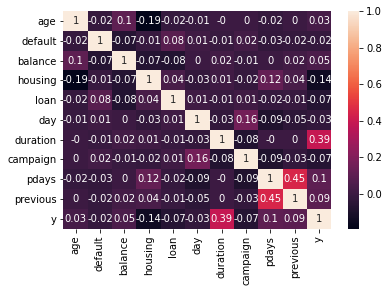

In [29]:
df_corr = X_train.corr().round(decimals = 2)
sns.heatmap(df_corr, annot = True, linewidths = 0)
plt.show()

In [40]:
oh = OneHotEncoder()
ct_train = make_column_transformer(( StandardScaler(), num_att_train),
    (OneHotEncoder(), cat_att_train), 
    remainder='passthrough')
x_train = ct_train.fit_transform(X_train)
x_train.shape

(45211, 49)

In [41]:
ct_test = make_column_transformer(( StandardScaler(), num_att_test),
    (OneHotEncoder(), cat_att_test), 
    remainder='passthrough')
x_test = ct_test.fit_transform(X_test)
x_test.shape

(4521, 49)

In [42]:
y_train = X_train.pop('y')
y_test = X_test.pop('y')

In [43]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [44]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [45]:
x_train.shape

(45211, 49)

In [46]:
x_test.shape

(4521, 49)

In [47]:
x_train

array([[ 1.60696496,  0.25641925, -1.29847633, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.28852927, -0.43789469, -1.29847633, ...,  1.        ,
         0.        ,  0.        ],
       [-0.74738448, -0.44676247, -1.29847633, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 2.92540065,  1.42959305,  0.14341818, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.51279098, -0.22802402,  0.14341818, ...,  0.        ,
         0.        ,  0.        ],
       [-0.37068857,  0.52836436,  0.14341818, ...,  0.        ,
         0.        ,  0.        ]])

### Here below we can see the null accuracy.


**Null accuracy:** is the accuracy we get by predicting the most frequent class, it would serve as baseline model. <br>
Our interest is to build a model that can beat this accuracy

In [48]:
y_train.value_counts(normalize=True)

0    0.883015
1    0.116985
Name: y, dtype: float64

Since our dataset is imbalanced we won't be using accuracy to measure the performance of the model. Therefore we will be using f1 score which targeted to reduce the false positive rate (fpr) and false negative rate(fnr). Our interest to reduce fpr and fnr because both of them are equally important; when we allow for fpr we will be spending money on  clients who have no interest in bank service while fnr leads to loosing clients who really have the interest in the service. 

In [49]:
dtc = DecisionTreeClassifier(random_state=1, )
cross_val = cross_val_score(dtc, x_train, y_train, cv=10, scoring='f1')
cross_val.mean()

1.0

In [50]:
rfc = RandomForestClassifier(random_state=0, criterion='entropy', max_depth=20)
rfc_cross_val = cross_val_score(rfc, x_train, y_train, cv=10, scoring='f1')
rfc_cross_val.mean()

1.0

In [51]:
lg = LogisticRegression()
lg_cross_val = cross_val_score(lg, x_train, y_train, cv=10, scoring='f1')
lg_cross_val.mean()

0.9999055712936734

In [52]:
knnc = KNeighborsClassifier(n_neighbors=3,leaf_size=26, weights='distance' ,p=1, )
knnc_cross_val = cross_val_score(knnc, x_train, y_train, cv=10, scoring='f1')
knnc_cross_val.mean()

0.5328690846429487

In [54]:
gnbc = GaussianNB()
gnbc_cross_val = cross_val_score(gnbc, x_train, y_train, scoring='f1')
gnbc_cross_val.mean()

0.9935070873342479

In [55]:
lsvc = LinearSVC()
lsvc_cross_val = cross_val_score(lsvc, x_train, y_train, scoring='f1')
lsvc_cross_val.mean()

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

1.0

In [56]:
gbc = GradientBoostingClassifier()
gbc_cross_val = cross_val_score(gbc, x_train, y_train, cv=10, scoring='f1')
gbc_cross_val.mean()

1.0

In [57]:
adc = AdaBoostClassifier()
adc_cross_val = cross_val_score(adc, x_train, y_train, cv=10, scoring='f1')
adc_cross_val.mean()

1.0

In [58]:
svc = SVC()
svc_cross_val = cross_val_score(svc, x_train, y_train, scoring='f1')
svc_cross_val.mean()

0.9935844978453104

In [60]:
model_df = pd.DataFrame({'Algorithm':['Decision_Tree', 'RandomForest', 'Linear Support Vector Classification.',
                                      'GradientBoostingClassifier','AdaBoostClassifier' ,'LogisticRegression', 'GaussianNB','KNN', 'SVC'],
                        'Accuracy':[cross_val.mean(), rfc_cross_val.mean(), lsvc_cross_val.mean(), 
                                    gbc_cross_val.mean(), adc_cross_val.mean() ,lg_cross_val.mean(), gnbc_cross_val.mean(), knnc_cross_val.mean(), svc_cross_val.mean()]})
model_df

,Algorithm,Accuracy
0,Decision_Tree,1.000000
1,RandomForest,1.000000
2,Linear Support Vector Classification.,1.000000
3,GradientBoostingClassifier,1.000000
4,AdaBoostClassifier,1.000000
5,LogisticRegression,0.999906
6,GaussianNB,0.993507
7,KNN,0.532869
8,SVC,0.993584


## **Model Evaluation**

Accuracy score:  1.0


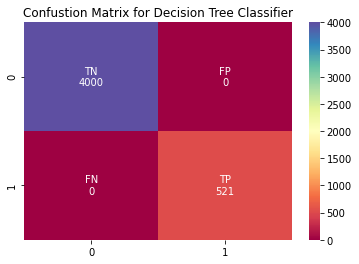

In [61]:
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy score: ', accuracy_score(y_test, y_pred))

group_title = ['TN', 'FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_title,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt='',cmap='Spectral')
plt.title('Confustion Matrix for Decision Tree Classifier')
plt.show()

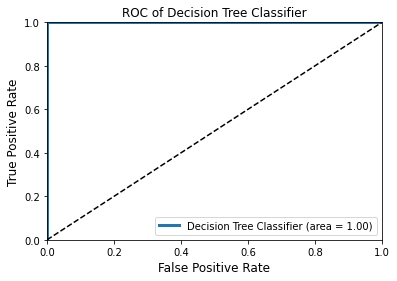

<Figure size 576x576 with 0 Axes>

In [93]:
#Plot ROC curve
dtc_auc = roc_auc_score(y_test, dtc.predict_proba(x_test)[:,1])
dtc_auc
FPr, TPr, threshold = roc_curve(y_test, dtc.predict_proba(x_test)[:,1])
plt.plot(FPr,TPr, linewidth=3, label = 'Decision Tree Classifier (area = %0.2f)' %dtc_auc)
plt.plot([0,1],[0,1],'k--') #draw the diagonal baseline
plt.title('ROC of Decision Tree Classifier')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(loc = 'lower right')
plt.figure(figsize=(8,8))
plt.show()

Accuracy score:  1.0


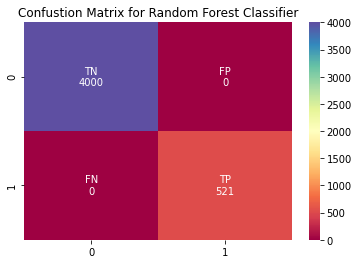

In [62]:
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy score: ', accuracy_score(y_test, y_pred))

group_title = ['TN', 'FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_title,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt='',cmap='Spectral')
plt.title('Confustion Matrix for Random Forest Classifier')
plt.show()

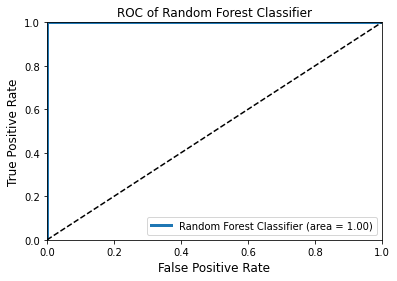

<Figure size 576x576 with 0 Axes>

In [94]:
#Plot ROC curve
rfc_auc = roc_auc_score(y_test, rfc.predict_proba(x_test)[:,1])
FPr, TPr, threshold = roc_curve(y_test, rfc.predict_proba(x_test)[:,1])
plt.plot(FPr,TPr, linewidth=3, label = 'Random Forest Classifier (area = %0.2f)' %rfc_auc)
plt.plot([0,1],[0,1],'k--') #draw the diagonal baseline
plt.title('ROC of Random Forest Classifier')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(loc = 'lower right')
plt.figure(figsize=(8,8))
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy score:  1.0


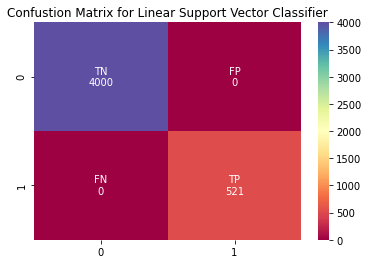

In [63]:
lsvc.fit(x_train, y_train)
y_pred = lsvc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy score: ', accuracy_score(y_test, y_pred))

group_title = ['TN', 'FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_title,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt='',cmap='Spectral')
plt.title('Confustion Matrix for Linear Support Vector Classifier')
plt.show()

Accuracy score:  1.0


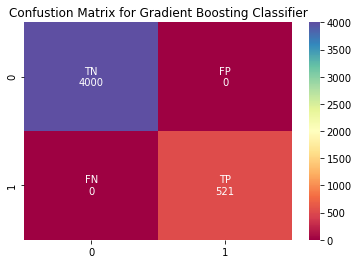

In [64]:
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy score: ', accuracy_score(y_test, y_pred))

group_title = ['TN', 'FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_title,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt='',cmap='Spectral')
plt.title('Confustion Matrix for Gradient Boosting Classifier')
plt.show()

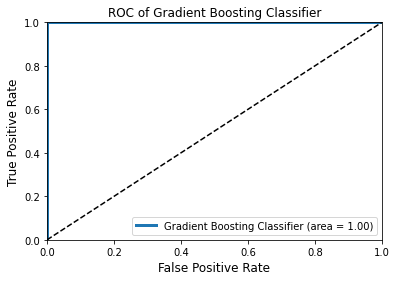

<Figure size 576x576 with 0 Axes>

In [95]:
#Plot ROC curve
gbc_auc = roc_auc_score(y_test, gbc.predict_proba(x_test)[:,1])
FPr, TPr, threshold = roc_curve(y_test, gbc.predict_proba(x_test)[:,1])
plt.plot(FPr,TPr, linewidth=3, label = 'Gradient Boosting Classifier (area = %0.2f)' %gbc_auc)
plt.plot([0,1],[0,1],'k--') #draw the diagonal baseline
plt.title('ROC of Gradient Boosting Classifier')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(loc = 'lower right')
plt.figure(figsize=(8,8))
plt.show()

Accuracy score:  1.0


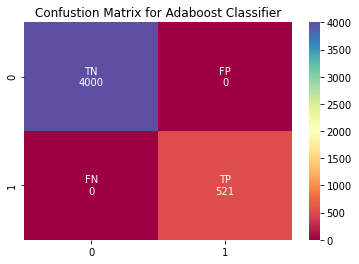

In [65]:
adc.fit(x_train, y_train)
y_pred = adc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy score: ', accuracy_score(y_test, y_pred))

group_title = ['TN', 'FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_title,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt='',cmap='Spectral')
plt.title('Confustion Matrix for Adaboost Classifier')
plt.show()

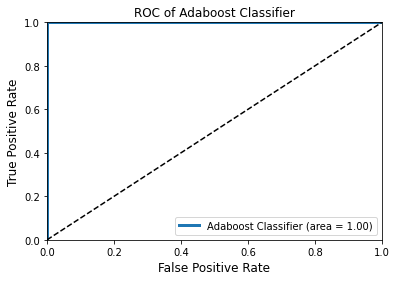

<Figure size 576x576 with 0 Axes>

In [96]:
#Plot ROC curve
adc_auc = roc_auc_score(y_test, adc.predict_proba(x_test)[:,1])
FPr, TPr, threshold = roc_curve(y_test, gbc.predict_proba(x_test)[:,1])
plt.plot(FPr,TPr, linewidth=3, label = 'Adaboost Classifier (area = %0.2f)' %adc_auc)
plt.plot([0,1],[0,1],'k--') #draw the diagonal baseline
plt.title('ROC of Adaboost Classifier')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(loc = 'lower right')
plt.figure(figsize=(8,8))
plt.show()

Accuracy score:  1.0


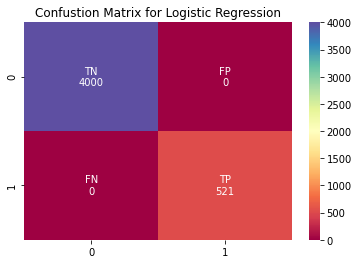

In [66]:
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy score: ', accuracy_score(y_test, y_pred))

group_title = ['TN', 'FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_title,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt='',cmap='Spectral')
plt.title('Confustion Matrix for Logistic Regression')
plt.show()

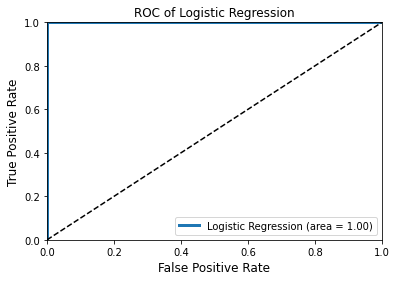

<Figure size 576x576 with 0 Axes>

In [98]:
#Plot ROC curve
lg_auc = roc_auc_score(y_test, adc.predict_proba(x_test)[:,1])
FPr, TPr, threshold = roc_curve(y_test, lg.predict_proba(x_test)[:,1])
plt.plot(FPr,TPr, linewidth=3, label = 'Logistic Regression (area = %0.2f)' %lg_auc)
plt.plot([0,1],[0,1],'k--') #draw the diagonal baseline
plt.title('ROC of Logistic Regression')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(loc = 'lower right')
plt.figure(figsize=(8,8))
plt.show()

Accuracy score:  1.0


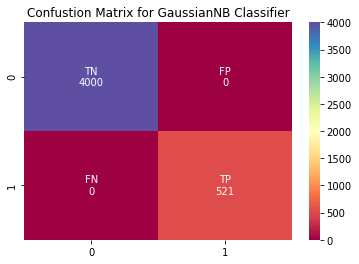

In [67]:
gnbc.fit(x_train, y_train)
y_pred = gnbc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy score: ', accuracy_score(y_test, y_pred))

group_title = ['TN', 'FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_title,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt='',cmap='Spectral')
plt.title('Confustion Matrix for GaussianNB Classifier')
plt.show()

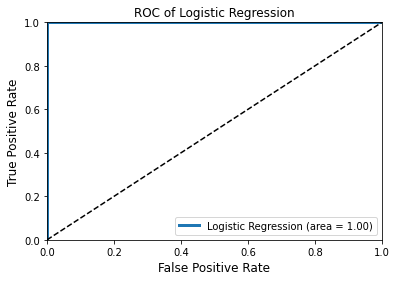

<Figure size 576x576 with 0 Axes>

In [99]:
#Plot ROC curve
gnbc_auc = roc_auc_score(y_test, gnbc.predict_proba(x_test)[:,1])
FPr, TPr, threshold = roc_curve(y_test, gnbc.predict_proba(x_test)[:,1])
plt.plot(FPr,TPr, linewidth=3, label = 'Logistic Regression (area = %0.2f)' %gnbc_auc)
plt.plot([0,1],[0,1],'k--') #draw the diagonal baseline
plt.title('ROC of Logistic Regression')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(loc = 'lower right')
plt.figure(figsize=(8,8))
plt.show()

Accuracy score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



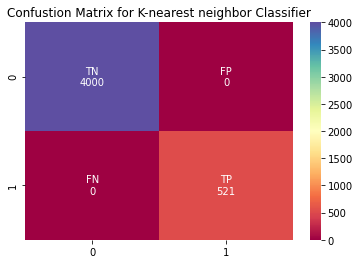

In [68]:
knnc.fit(x_train, y_train)
y_pred = knnc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
group_title = ['TN', 'FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_title,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt='',cmap='Spectral')
plt.title('Confustion Matrix for K-nearest neighbor Classifier')
plt.show()

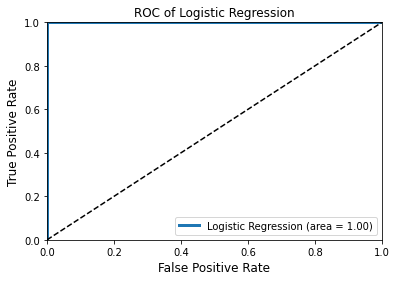

<Figure size 576x576 with 0 Axes>

In [100]:
#Plot ROC curve
knnc_auc = roc_auc_score(y_test, gnbc.predict_proba(x_test)[:,1])
FPr, TPr, threshold = roc_curve(y_test, knnc.predict_proba(x_test)[:,1])
plt.plot(FPr,TPr, linewidth=3, label = 'Logistic Regression (area = %0.2f)' %knnc_auc)
plt.plot([0,1],[0,1],'k--') #draw the diagonal baseline
plt.title('ROC of Logistic Regression')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(loc = 'lower right')
plt.figure(figsize=(8,8))
plt.show()

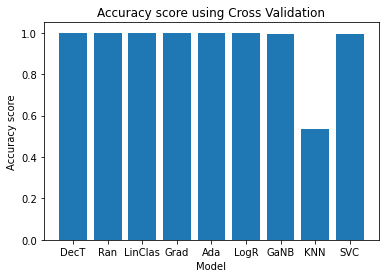

In [110]:
# Bar graph represents accuracy score for 4 models using Cross Validation

plt.bar(['DecT', 'Ran', 'LinClas',
        'Grad','Ada' ,'LogR', 'GaNB','KNN', 'SVC'], 
        [cross_val.mean(), rfc_cross_val.mean(), lsvc_cross_val.mean(), gbc_cross_val.mean(), adc_cross_val.mean(), 
         lg_cross_val.mean(), gnbc_cross_val.mean(), knnc_cross_val.mean(), svc_cross_val.mean()])
plt.xlabel("Model")
plt.ylabel("Accuracy score")
plt.title("Accuracy score using Cross Validation")
plt.show()

Summary: Most of the models giving 100 % accuracy after 10 folded cross validation but this case can be sign as overfitting and requires to reduce it to avoid unpleasant consequences. 